#  Analysis on ML Test Scores

## Importing all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading The Data

In [2]:
df = pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


## Describing Data

Batch - Represents the Batch Name

User_ID - Represents the unique student id

Score - Represents the Score out of 7

In [3]:
df.shape

(149, 3)

In [4]:
df.nunique()

Batch            3
User_ID        149
   Score         8
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [6]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


### Batch Column

In [8]:
df['Batch'].value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

In [9]:
df['Batch'] = df['Batch'].str.replace('AI_ELITE_', '')
df['Batch'] = df['Batch'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    int32 
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: int32(1), object(2)
memory usage: 3.0+ KB


In [11]:
df.sample(5)

,Batch,User_ID,Score
92,6,uid_57,2 / 7
129,4,uid_20,1 / 7
3,7,uid_146,7 / 7
17,7,uid_132,7 / 7
90,6,uid_59,3 / 7


In [12]:
df['Batch'].value_counts()

7    53
6    48
4    48
Name: Batch, dtype: int64

### User_ID Column

In [13]:
df['User_ID'] = df['User_ID'].str.replace('uid_', '')
df['User_ID'] = df['User_ID'].astype('int')

In [14]:
df['User_ID'].unique()

array([149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137,
       136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124,
       123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,
        97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,
        84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,  72,
        71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,  59,
        58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,  46,
        45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,
        32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,  20,
        19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,
         6,   5,   4,   3,   2,   1])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    int32 
 1   User_ID  149 non-null    int32 
 2   Score    149 non-null    object
dtypes: int32(2), object(1)
memory usage: 2.5+ KB


### Score Column

In [16]:
df['Score'] = df['Score'].str.replace('/ 7', '')
df['Score'] = df['Score'].astype('int')

In [17]:
df['Score'].value_counts()

4    40
5    32
3    24
6    18
7    18
2    12
1     3
0     2
Name: Score, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Batch    149 non-null    int32
 1   User_ID  149 non-null    int32
 2   Score    149 non-null    int32
dtypes: int32(3)
memory usage: 1.9 KB


In [19]:
df.sample(5)

,Batch,User_ID,Score
132,4,17,4
66,6,83,5
6,7,143,5
121,4,28,3
69,6,80,5


In [20]:
df.rename(columns={'Batch':'AI_ELITE Batch','User_ID':'User_ID(uid)','Score':'Score(out of 7)'},inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   AI_ELITE Batch   149 non-null    int32
 1   User_ID(uid)     149 non-null    int32
 2   Score(out of 7)  149 non-null    int32
dtypes: int32(3)
memory usage: 1.9 KB


In [22]:
df.sample(5)

,AI_ELITE Batch,User_ID(uid),Score(out of 7)
103,4,46,4
134,4,15,4
32,7,117,3
6,7,143,5
52,7,97,3


In [23]:
df.nunique()

AI_ELITE Batch       3
User_ID(uid)       149
Score(out of 7)      8
dtype: int64

## Missing Values

In [24]:
df.isnull().sum()

AI_ELITE Batch     0
User_ID(uid)       0
Score(out of 7)    0
dtype: int64

## Duplicated Values

In [25]:
df.duplicated().sum()

0

## Descriptive Stats

In [26]:
df.describe()

,AI_ELITE Batch,User_ID(uid),Score(out of 7)
count,149.000000,149.000000,149.000000
mean,5.711409,75.000000,4.382550
std,1.253618,43.156691,1.592199
min,4.000000,1.000000,0.000000
25%,4.000000,38.000000,3.000000
50%,6.000000,75.000000,4.000000
75%,7.000000,112.000000,5.000000
max,7.000000,149.000000,7.000000


## UniVariate Analysis

### BoxPlot

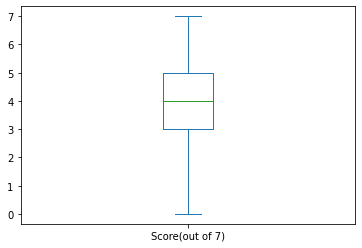

In [27]:
# Detection of Outlier

df['Score(out of 7)'].plot(kind='box')
plt.show()

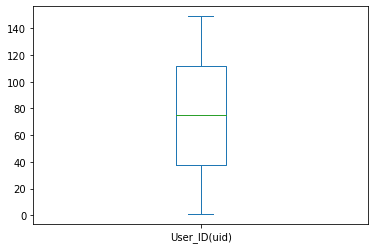

In [28]:
# Detection of Outlier

df['User_ID(uid)'].plot(kind='box')
plt.show()

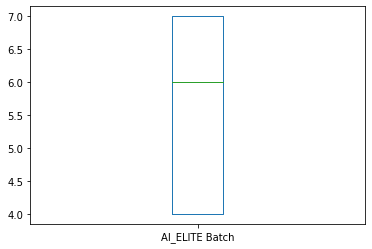

In [29]:
# Detection of Outlier

df['AI_ELITE Batch'].plot(kind='box')
plt.show()

### CountPlot

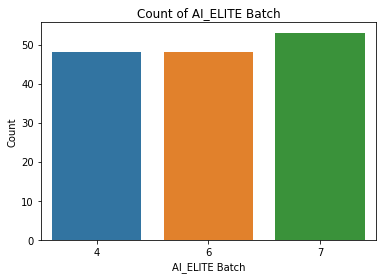

In [30]:
# Create a countplot for AI_ELITE Batch
sns.countplot(df['AI_ELITE Batch'])
plt.title('Count of AI_ELITE Batch')
plt.xlabel('AI_ELITE Batch')
plt.ylabel('Count')
plt.show()

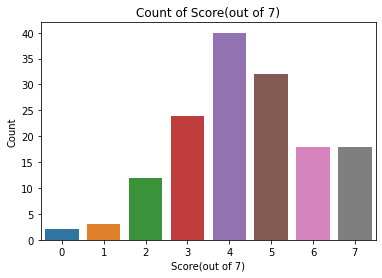

In [31]:
# Create a countplot for Score(out of 7)
sns.countplot(df['Score(out of 7)'])
plt.title('Count of Score(out of 7)')
plt.xlabel('Score(out of 7)')
plt.ylabel('Count')
plt.show()

### Histogram

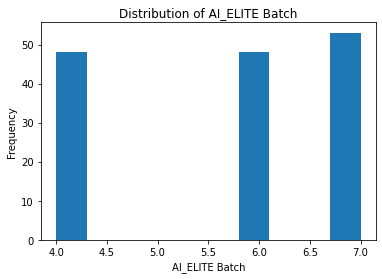

In [32]:
# Create a histogram to show the distribution of AI_ELITE Batch
plt.hist(df['AI_ELITE Batch'])
plt.title('Distribution of AI_ELITE Batch')
plt.xlabel('AI_ELITE Batch')
plt.ylabel('Frequency')
plt.show()

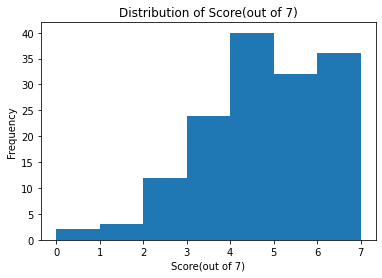

In [33]:
# Create a histogram to show the distribution of Score(out of 7)
plt.hist(df['Score(out of 7)'], bins=7)
plt.title('Distribution of Score(out of 7)')
plt.xlabel('Score(out of 7)')
plt.ylabel('Frequency')
plt.show()

### Distplot

<AxesSubplot:xlabel='Score(out of 7)', ylabel='Density'>

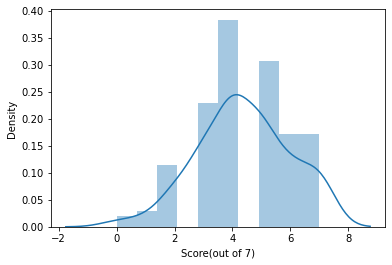

In [34]:
sns.distplot(df['Score(out of 7)'])

<AxesSubplot:xlabel='AI_ELITE Batch', ylabel='Density'>

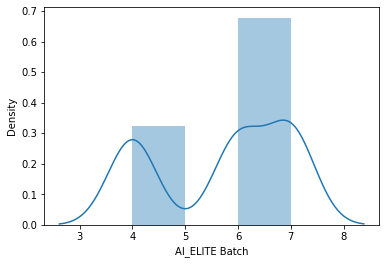

In [35]:
sns.distplot(df['AI_ELITE Batch'])

<AxesSubplot:xlabel='User_ID(uid)', ylabel='Density'>

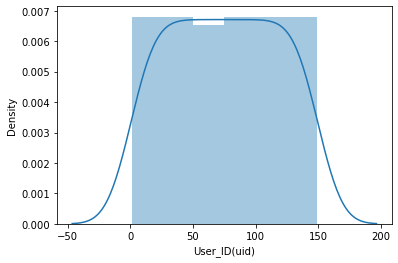

In [36]:
sns.distplot(df['User_ID(uid)'])

### Kdeplot

<AxesSubplot:xlabel='Score(out of 7)', ylabel='Density'>

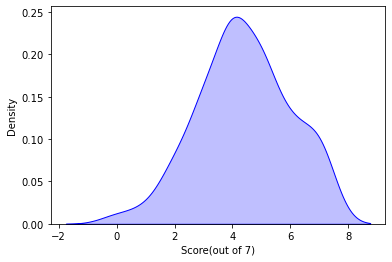

In [37]:
sns.kdeplot(df['Score(out of 7)'],color='b', shade=True)

<AxesSubplot:xlabel='AI_ELITE Batch', ylabel='Density'>

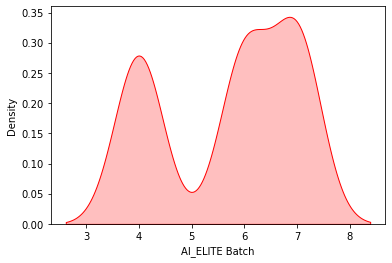

In [38]:
sns.kdeplot(df['AI_ELITE Batch'],color='r', shade=True)

<AxesSubplot:xlabel='User_ID(uid)', ylabel='Density'>

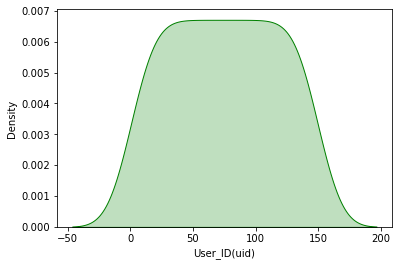

In [39]:
sns.kdeplot(df['User_ID(uid)'],color='g', shade=True)

## Bivariate Analysis

### ScatterPlot

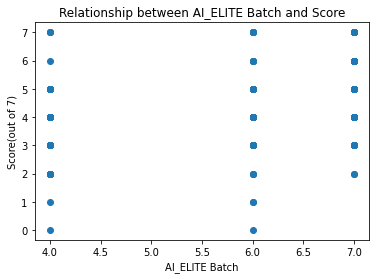

In [40]:
# Create a scatter plot to show the relationship between AI_ELITE Batch and Score(out of 7)
plt.scatter(df['AI_ELITE Batch'], df['Score(out of 7)'])
plt.title('Relationship between AI_ELITE Batch and Score')
plt.xlabel('AI_ELITE Batch')
plt.ylabel('Score(out of 7)')
plt.show()

### CountPlot

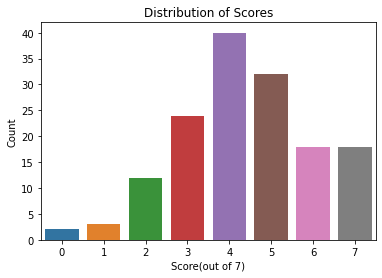

In [41]:
# Create a count plot to show the distribution of scores
sns.countplot(df['Score(out of 7)'])
plt.title('Distribution of Scores')
plt.xlabel('Score(out of 7)')
plt.ylabel('Count')
plt.show()

### KDE Distribution

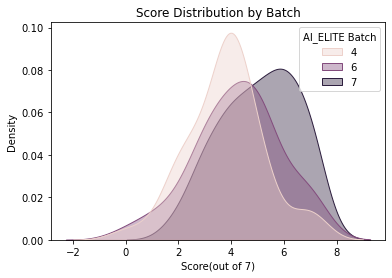

In [42]:
# Create a KDE distribution plot to show the distribution of scores by batch
sns.kdeplot(data=df, x="Score(out of 7)", hue="AI_ELITE Batch", fill=True, alpha=0.4)
plt.title('Score Distribution by Batch')
plt.xlabel('Score(out of 7)')
plt.ylabel('Density')
plt.show()

## Multivariate Analysis

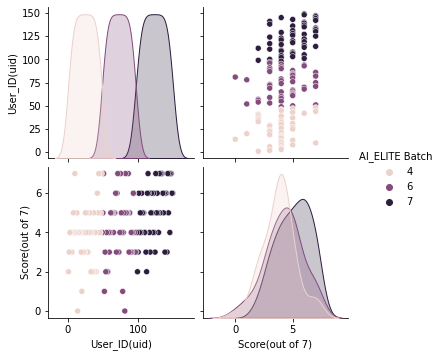

In [43]:
sns.pairplot(data=df, hue='AI_ELITE Batch')

# Insight

### Finding which batch performed well according to mean scores

In [44]:
# Calculate the mean score for each batch
mean_scores = df.groupby('AI_ELITE Batch')['Score(out of 7)'].mean()

# Print the mean scores for each batch
print(mean_scores)

AI_ELITE Batch
4    3.791667
6    4.229167
7    5.056604
Name: Score(out of 7), dtype: float64


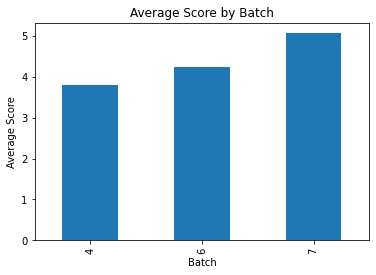

In [45]:
batch_avg = df.groupby('AI_ELITE Batch').mean()['Score(out of 7)']
batch_avg.plot(kind='bar')
plt.title('Average Score by Batch')
plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.show()

Hence AI_ELITE_7 Batch has highest mean score when compared to other 2 batches

##  Conclusion

AI_ELITE_7 -> Best Batch

AI_ELITE_6 -> Average Performing Batch

AI_ELITE_4 -> Weak Batch